In [1]:
from diffpy.structure.parsers import getParser
from pathlib import Path
stru_parser = getParser("cif")

In [2]:
cif_path = Path().cwd().parent / "data" / "Ni.cif"
structure = stru_parser.parse(cif_path.read_text())

In [3]:
from diffpy.srreal.pdfcalculator import DebyePDFCalculator, PDFCalculator
cfg = {
    "qmax": 25,
    "rmin": 0,
    "rmax": 10.001,
    "rstep": 0.05,
}
pc0 = PDFCalculator(**cfg)
r0, g0 = pc0(structure)

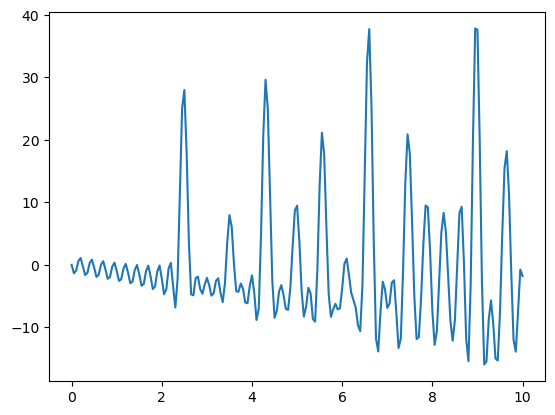

In [4]:
import matplotlib.pyplot as plt
plt.plot(r0, g0)

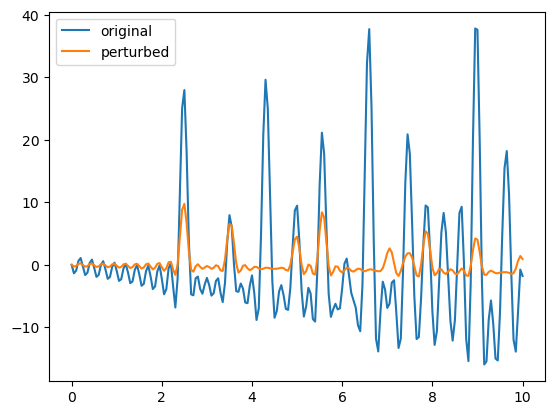

In [7]:
from PDFexperiment import PDFexperiment
experiment = PDFexperiment()
experiment.load_inputs(structure_txt=cif_path.read_text())
r, g = experiment.generate()
plt.plot(r, g, label='original')
experiment.perturb_parameter('a', 1, 10)
r, g = experiment.generate()
plt.plot(r, g, label='perturbed')
plt.legend()

In [8]:
for pname, param in experiment.parameters.items():
    print(f"{pname}: {param.value}")

a: 31.23006260319371
Uiso_0: 0.0012665147955292222
scale: 1.0
delta1: 0.0
delta2: 0.0
qdamp: 0.0
qbroad: 0.0
